### Importing Libraries

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def display_img(img, axis=False, grayscale=False):
    if grayscale:
        if len(img.shape) == 3:  # Check if the image is RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to grayscale
        cmap = 'gray'
    else:
        if len(img.shape) == 2:  # Check if the image is grayscale
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
        cmap = None

    plt.imshow(img, cmap=cmap)
    if not axis:
        plt.axis('off')
    plt.show()

In [19]:
""" def bb_display(img_copia, resultado, min_conf):
    for i in range(0, len(resultado['text'])):
        confianca = int(resultado['conf'][i])
        if confianca > min_conf:
            texto = resultado['text'][i]
            if not texto.isspace() and len(texto) > 0:
                x, y, img = caixa_texto(resultado, img_copia)
                img_copia = write_text(texto, x, y, img_copia, fonte)
    display_img(img_copia) """

" def bb_display(img_copia, resultado, min_conf):\n    for i in range(0, len(resultado['text'])):\n        confianca = int(resultado['conf'][i])\n        if confianca > min_conf:\n            texto = resultado['text'][i]\n            if not texto.isspace() and len(texto) > 0:\n                x, y, img = caixa_texto(resultado, img_copia)\n                img_copia = write_text(texto, x, y, img_copia, fonte)\n    display_img(img_copia) "

### Grayscale

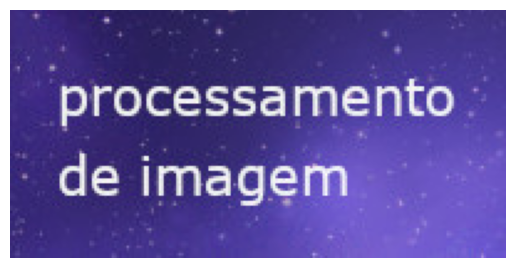

In [20]:
img = cv2.imread('Imagens/img-process.jpg')
#display_img(img, axis=False)
display_img(img)

In [26]:
img.shape

(100, 200, 3)

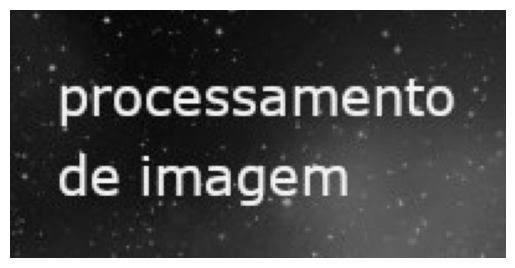

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display_img(gray, axis=False, grayscale=True)

In [31]:
gray.shape

(100, 200)

### Thresholding

Thresholding, also known as binarization, is the simplest method of image segmentation.


 It consists of separating an image into regions of interest and non-interest by choosing a cutoff point (called a threshold).

The value of the new color that the pixel will have is calculated according to the cutoff point (threshold).
Any pixel with an intensity lower or equal to the threshold becomes black.
If the pixel has an intensity greater than the threshold, it becomes white.

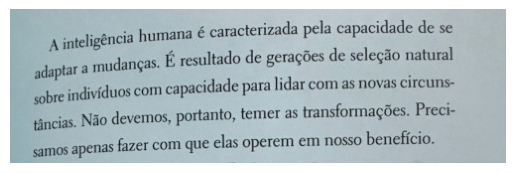

In [32]:
img = cv2.imread('Imagens/trecho-livro.jpg')
display_img(img)

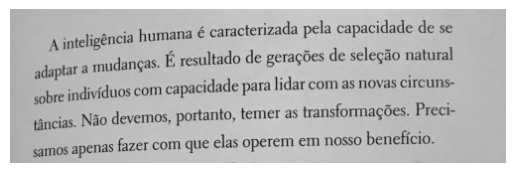

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)

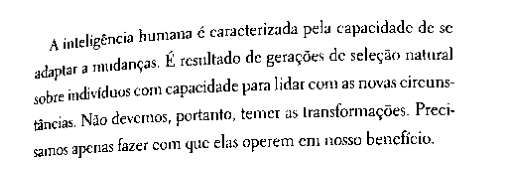

127.0


In [38]:
val, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
display_img(threshold)
print(val)

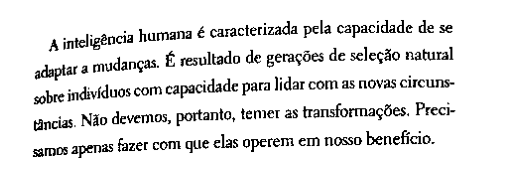

150.0


In [42]:
val, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
display_img(threshold)
print(val)

# Otsu binarization method

### Here's a step-by-step overview of the Otsu binarization method:

* Compute the histogram: Calculate the distribution of pixel intensities in the input grayscale image.
* Normalize the histogram to obtain probabilities of each intensity level.
Iterate through all possible threshold values from 0 to the maximum intensity level.
* Calculate the between-class variance for each threshold value. This is done by dividing the histogram into two classes: pixels below the threshold (background) and pixels above or equal to the threshold (foreground).
* Compute the weighted sum of variances for both classes, taking into account their probabilities.
* Find the threshold value that maximizes the between-class variance or minimizes the intra-class variance.
* Apply the selected threshold to the original image. Pixels below the threshold are assigned to the background, while pixels above or equal to the threshold are assigned to the foreground.

In [98]:
import numpy as np

def otsu_func(histogram_counts):
    total_pixels = np.sum(histogram_counts)  # total number of pixels in the image
    
    # OTSU automatic thresholding
    intensity_levels = len(histogram_counts)
    sum_background = 0
    weight_background = 0
    maximum_variance = 0.0
    sum_intensity = np.dot(np.arange(intensity_levels), histogram_counts)
    
    for threshold in range(intensity_levels):
        weight_foreground = total_pixels - weight_background
        if weight_background > 0 and weight_foreground > 0:
            mean_foreground = (sum_intensity - sum_background) / weight_foreground
            variance = weight_background * weight_foreground * ((sum_background / weight_background) - mean_foreground) ** 2
            if variance >= maximum_variance:
                optimal_threshold = threshold
                maximum_variance = variance
        weight_background += histogram_counts[threshold]
        sum_background += threshold * histogram_counts[threshold]
    
    return optimal_threshold


In [99]:
def otsu_binarization(img):
    histogram, _ = np.histogram(img.flatten(), bins=256, range=[0, 256])
    threshold = otsu_func(histogram)
    binary_image = np.where(img >= threshold, 255, 0)
    return threshold, binary_image.astype(np.uint8)


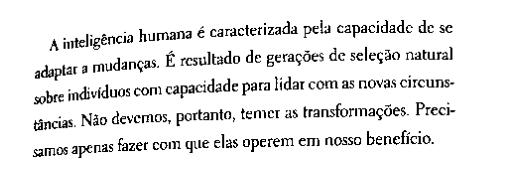

138.0


In [100]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_img(otsu)
print(val)

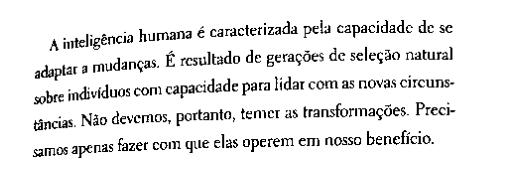

139


In [101]:
val, our_otsu = otsu_binarization(gray)
display_img(our_otsu)
print(val)

The Otsu method is effective in cases where the image contains distinct foreground and background regions with a clear separation in pixel intensities. It automatically determines the optimal threshold without the need for manual intervention. This makes it particularly useful for tasks such as image segmentation, object recognition, and feature extraction.

Overall, the Otsu binarization method provides a robust and efficient way to automatically threshold images, allowing for effective separation of objects from the background based on their intensity characteristics.

### Let's compare otsu with a predefined threshhold

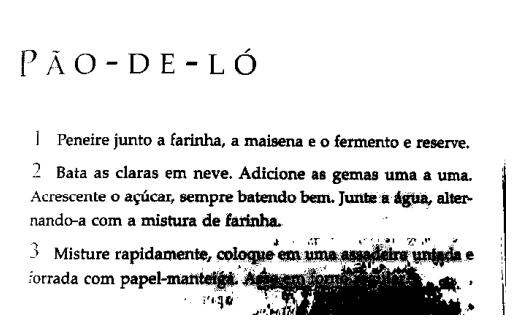

In [105]:
img = cv2.imread("Imagens/receita01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, threshold = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
display_img(threshold)

##### OUR OTSU FUNCTION

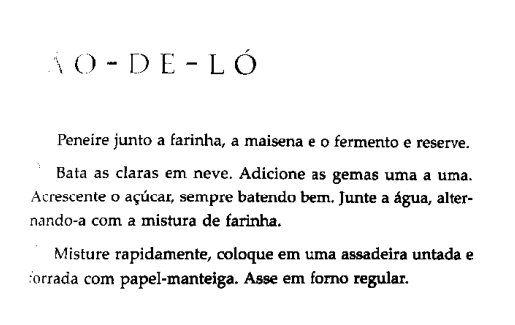

120


In [106]:
val, our_otsu = otsu_binarization(gray)
display_img(our_otsu)
print(val)

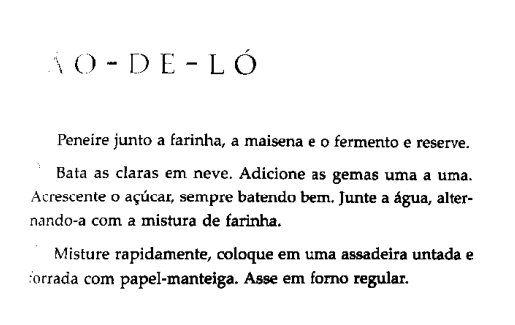

119.0


In [107]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_img(otsu)
print(val)

Conclusion:We concluded that our otsu is very close to the otsu function from cv2

### adaptative thresholding

* Split the image into small, overlapping regions or tiles. The size of these regions can be predefined or adjusted based on the image size and characteristics.

* For each region, calculate a local threshold to separate the foreground and background pixels. There are different methods to determine the local threshold, such as mean, median, or Gaussian-weighted average.

* Apply the computed threshold to the corresponding region. Pixels with intensity values above the threshold are assigned to the foreground, while those below the threshold are assigned to the background.

* Repeat steps 2 and 3 for all the regions in the image.

* Combine the thresholded regions to form the final binarized image. This can be achieved by merging the thresholded regions using appropriate techniques such as interpolation or blending.


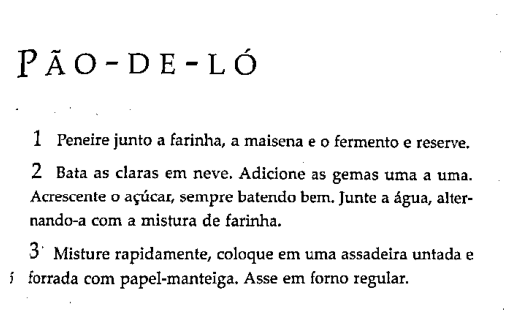

In [110]:
adapt_media = cv2.adaptiveThreshold(gray,
                                    255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 11, 9)
display_img(adapt_media)

### Gaussian adaptative thresholding

* Divide the image into small overlapping regions (sub-images) of a fixed size.

* For each region, calculate the local mean value of pixel intensities. This is done by applying a Gaussian filter to the region, which smoothes the image and reduces noise.

* Calculate the local threshold for each region. The local threshold is computed as a weighted average of the local mean value and a constant offset value. The offset value is subtracted from the local mean to determine the threshold.

* Compare the pixel intensities of the original image within each region with the corresponding local threshold. If a pixel intensity is greater than or equal to the threshold, it is set to a maximum value (typically white or 255), indicating foreground. Otherwise, it is set to a minimum value (typically black or 0), indicating background.

* Repeat Steps 2-4 for all regions in the image.

* Merge the thresholded regions back into a single binary image.

By adapting the threshold on a local level, the Adaptive Thresholding (Gaussian) method can handle variations in brightness and contrast, allowing for more accurate binarization and segmentation of the image.


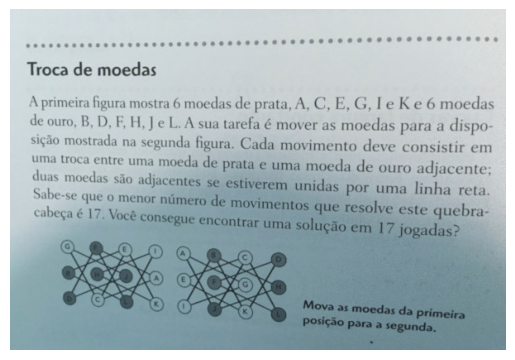

In [111]:
img = cv2.imread("Imagens/livro_adaptativa.jpg")
display_img(img)

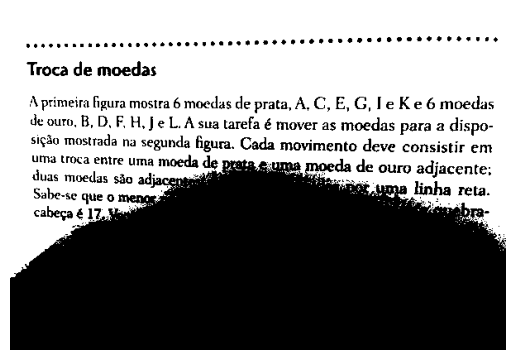

175.0


In [113]:
#let's compare otsu with gausian
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display_img(otsu)
print(val)

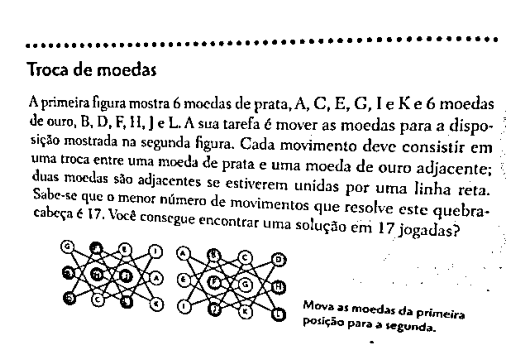

In [114]:
adapt_media = cv2.adaptiveThreshold(gray,
                                    255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 11, 9)
display_img(adapt_media)

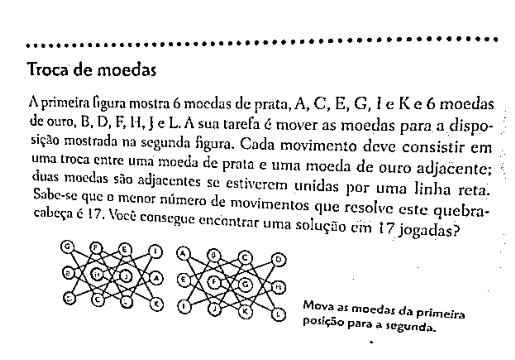

In [116]:
adapt_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
display_img(adapt_gauss)

Conclusion: The gaussian method works much better for images with different colors and shadows

### Color inversion
it is recommended for the image to have a white background, so let's use it to invert the colors in the following case

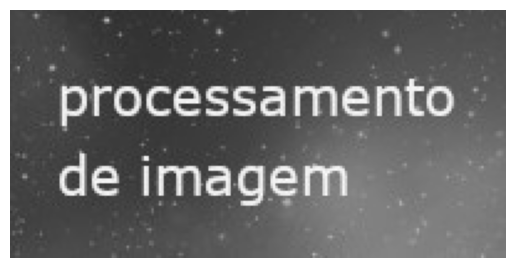

In [117]:
img = cv2.imread('Imagens/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)

In [118]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [119]:
invert = 255-gray

In [120]:
print(invert)

[[187 185 183 ... 179 181 181]
 [187 185 182 ... 180 181 178]
 [185 185 183 ... 181 182 179]
 ...
 [188 186 173 ... 132 132 131]
 [185 179 163 ... 131 131 130]
 [185 185 175 ... 132 133 132]]


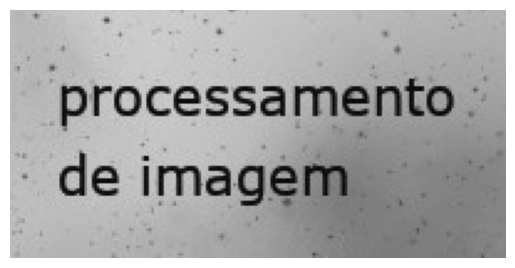

In [121]:
display_img(invert)

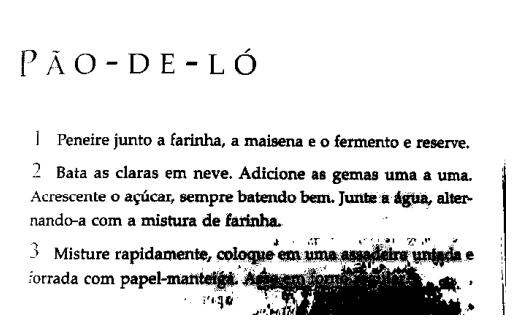

In [122]:
display_img(threshold)

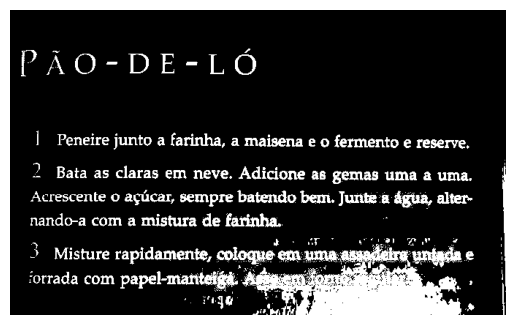

In [123]:
invert = 255-threshold
display_img(invert)

# image rescaling



![Image Alt Text](matrix_rescale.png)

* for det A > 1 $->$ the image gets greater
* for det A < 1 $->$ gets smaller
* if $S_x$ = $S_y ->$ there are no distortions on the image

resize	(	InputArray 	src,
OutputArray 	dst,
Size 	dsize,
double 	fx = 0,
double 	fy = 0,
int 	interpolation = INTER_LINEAR 
)	

The resize() function is used to change the size of an image. It can make the image larger or smaller based on the specified parameters.

Here are the main components of the function:

#### Parameters:

* src: This is the input image that you want to resize.
* dst: This is the output image where the resized image will be stored. Its size will be determined based on the specified parameters.
* dsize: This is the desired size of the output image. If set to zero (or None in Python), the size will be calculated based on other parameters.
* fx and fy: These are scale factors that determine the resizing ratio along the horizontal and vertical axes, respectively. If either dsize or both fx and fy are non-zero, the resizing will be performed accordingly.
* interpolation: This parameter determines the method used to interpolate the pixel values during the resizing process. There are several options available, such as nearest neighbor, bilinear, bicubic, and more.
#### Resizing scenarios:

* If you want to resize the source image (src) to fit the size of a pre-created destination image (dst), you can simply call the function with dsize set to dst.size(). The fx and fy values will be automatically calculated based on that.
* If you want to shrink the image by a specific factor in each direction, you can set dsize to zero and provide the scale factors (fx and fy) directly. The destination image size will be computed accordingly.
#### Interpolation methods:

* Different interpolation methods are available for resizing, and the choice depends on whether you are enlarging or shrinking the image.
For shrinking, using the INTER_AREA method generally produces better results. It applies resampling using the pixel area relation and helps reduce artifacts.
* For enlarging, the INTER_CUBIC method provides high-quality results but is slower, while INTER_LINEAR is faster but still gives decent output.
* Other interpolation methods, such as nearest neighbor, Lanczos, bit exact bilinear, and bit exact nearest neighbor, are also available.
Additionally, there are two flags mentioned in the documentation:

* WARP_FILL_OUTLIERS: This flag determines how to handle destination image pixels that don't have corresponding pixels in the source image. If set, those pixels will be set to zero.
* WARP_INVERSE_MAP: This flag indicates whether to perform an inverse transformation. It is useful in certain transformations like linearPolar or logPolar, where the mapping is different.
Remember that the output image (dst) will have the same type as the input image (src), and its size will depend on the specified parameters.

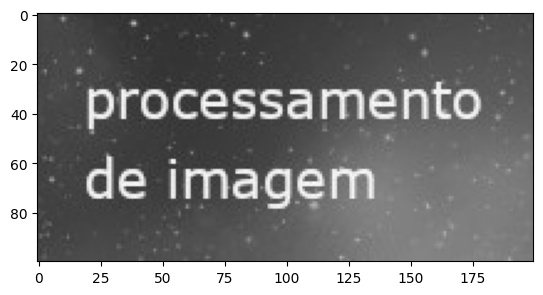

In [128]:
display_img(gray, True)

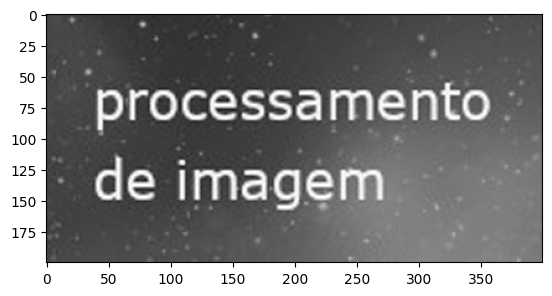

In [134]:
bigger = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
display_img(bigger, axis=True)

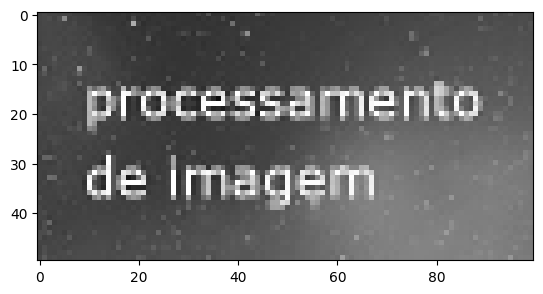

In [135]:
bigger = cv2.resize(gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
display_img(bigger, axis=True)

# MORPHOLOGICAL OPERATIONS - EROSION AND DILATION

##### Erosion:

* Erosion is a morphological operation that shrinks or erodes the boundaries of foreground objects in an image.
* It achieves this by traversing the image with a structuring element (a small shape or kernel) and replacing each pixel with the minimum value of its neighborhood.
* Erosion is useful for removing small noise or fine details, separating connected objects, and smoothing object boundaries.
##### Dilation:

* Dilation is a morphological operation that expands or dilates the boundaries of foreground objects in an image.
* It also uses a structuring element and replaces each pixel with the maximum value of its neighborhood.
* Dilation helps in enlarging objects, filling gaps, joining broken parts, and making objects more visible or connected.

##### Opening:

* Opening is a morphological operation that consists of an erosion followed by a dilation.
* It helps in removing small objects, smoothing object boundaries, and separating connected objects.
* Opening is effective in reducing noise, eliminating thin structures, and preserving the general shape and size of larger objects.
##### Closing:

* Closing is a morphological operation that consists of a dilation followed by an erosion.
* It helps in closing small gaps, joining broken parts of objects, and filling holes in object regions.
* Closing is useful for smoothing object boundaries, connecting nearby objects, and completing object shapes.

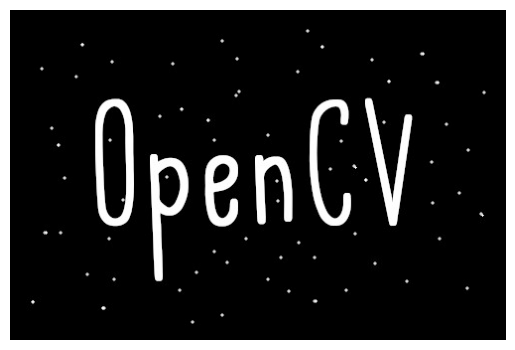

In [137]:
img = cv2.imread('Imagens/texto-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)

##### Erosion:

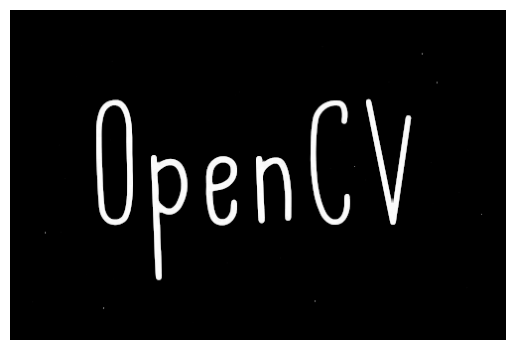

In [142]:
erosion = cv2.erode(gray, np.ones((3, 3))) #kernel size
display_img(erosion)

##### Dilation:


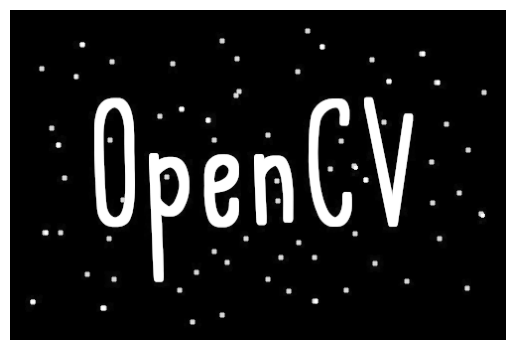

In [143]:
dilation = cv2.dilate(gray, np.ones((3, 3)))
display_img(dilation)

##### Opening:

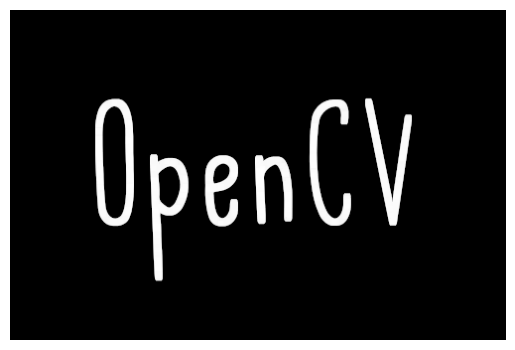

In [146]:
erosion = cv2.erode(gray, np.ones((5, 5))) #kernel size
opening = cv2.dilate(erosion, np.ones((5, 5)))
display_img(opening)

##### Closing:

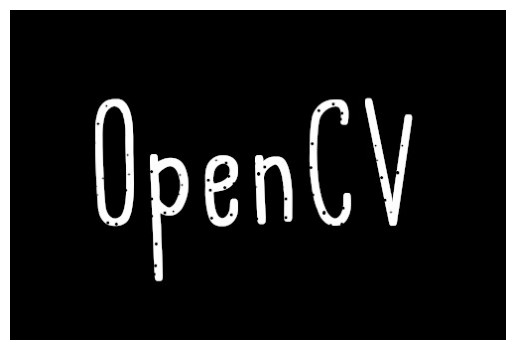

In [147]:
img = cv2.imread("Imagens/texto-opencv2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)

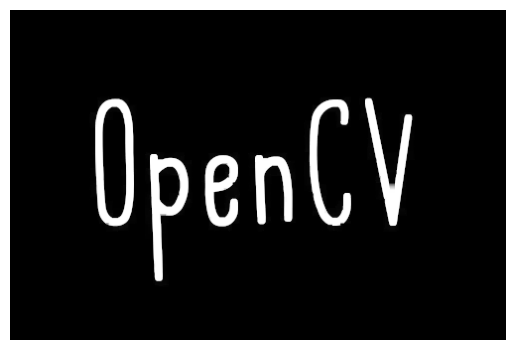

In [148]:
dilate = cv2.dilate(gray, np.ones((5, 5)))
closing= cv2.erode(dilate, np.ones((5, 5))) #kernel size
display_img(closing)

# NOISE REMOVAL WITH BLURRING

Blurring, also known as smoothing or averaging, is a common technique used for noise removal in image processing. Here's an explanation of how blurring can be used to remove noise:

### Blurring:

* Blurring is a process that involves reducing the sharpness or detail in an image by applying a smoothing filter.
* The blurring filter works by averaging the pixel values in a local neighborhood around each pixel.
* This averaging process helps to smooth out variations and reduce high-frequency noise in the image.
### Noise Removal:

* By applying a blurring filter, high-frequency noise components are effectively averaged out, resulting in a reduction in noise.
* The blurring operation smooths the image and helps eliminate small variations or inconsistencies caused by noise.
* However, it's important to strike a balance between noise removal and preserving the important details and edges in the image.

### Blur with mean/average
##### Mean/average filter:

* The mean filter is a simple blurring technique that replaces each pixel in the image with the average of its neighboring pixels.
* It involves applying a convolution operation where each pixel is replaced by the average value of the pixel intensities within a defined neighborhood or kernel.
* The size of the neighborhood determines the extent of blurring: larger neighborhoods result in stronger blurring.

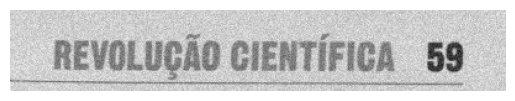

In [149]:
img = cv2.imread('Imagens/teste_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)

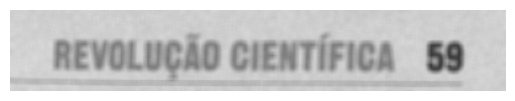

In [150]:
mean_blur = cv2.blur(gray, (5, 5))
display_img(mean_blur)

Conclusion:Bad for ocr extraction, once it blurs the text also

# gaussian blur

The Gaussian kernel is a square matrix with symmetric values that follow a Gaussian distribution. The size of the matrix and the standard deviation of the distribution determine the strength and extent of the blurring effect.

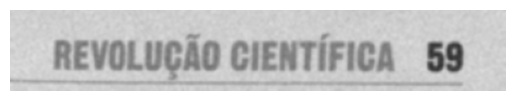

In [151]:
gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
display_img(gaussian)

# median blur

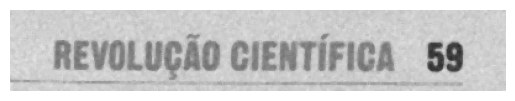

In [153]:
median_blur = cv2.medianBlur(gray, 3)
display_img(median_blur)

# Bilateral Filter

##### Parameters
* src	Source 8-bit or floating-point, 1-channel or 3-channel image.
* dst	Destination image of the same size and type as src .
* d	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
* sigmaColor	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
* sigmaSpace	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
* borderType	border mode used to extrapolate pixels outside of the image, see BorderTypes

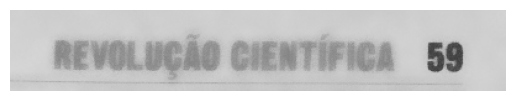

In [154]:
bilateral = cv2.bilateralFilter(gray, 15, 55, 45)
display_img(bilateral)

# Text detection with tesseract

In [158]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = """C:\Program Files\Tesseract-OCR\\tesseract.exe"""

![psm.png](psm.png)

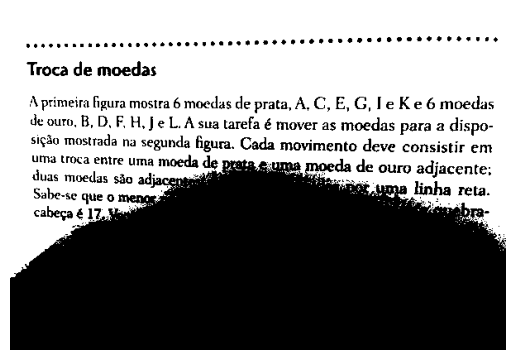

In [159]:
display_img(otsu)

In [162]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(otsu, lang='por', config=config_tesseract)
print(text)

Troca de moedas

A primeira figura mostra 6 moedas de prata, A, C, E, G, l e K e 6 moedas
de ouro, B, D, F. H, J e L. À sua tarefa é mover as moedas para a dispo-
sição mostrada na segunda figura. Cada movimento deve consistir em
uma troca entre uma moeda de prata &.uma moeda de ouro adjacente;
duas moedas são adjacengas “ -uma linha reta.
Sabe-se que o mengs TEA
cabeça é 17, Vexi s



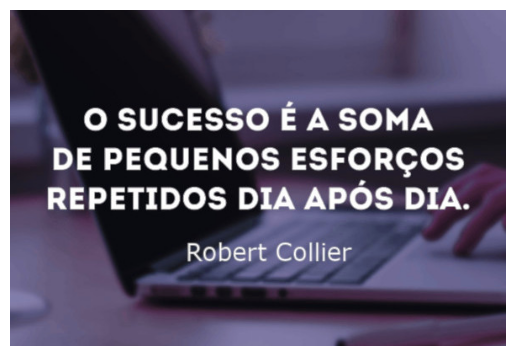

In [164]:
img = cv2.imread('Imagens/teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(rgb)

In [165]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier



Conclusion: the image is already readable to ocr, but let's try to make it better

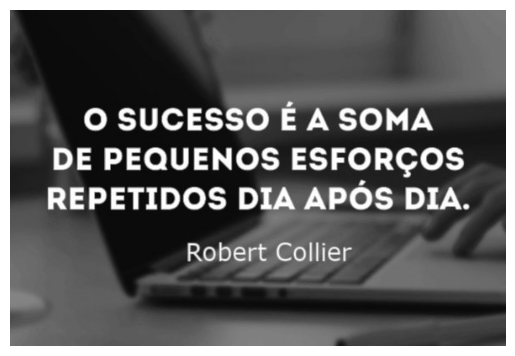

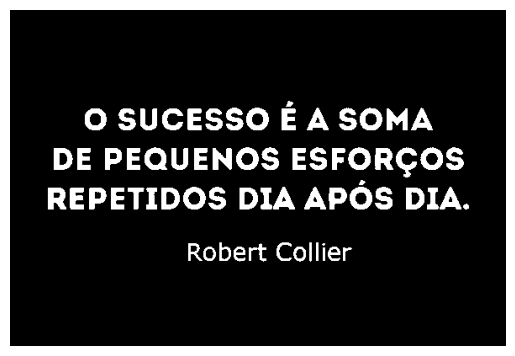

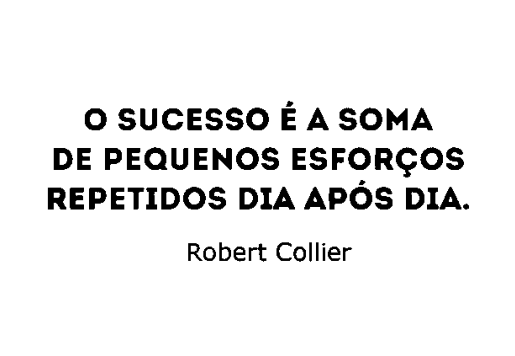

In [173]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(gray)
val, our_otsu = otsu_binarization(gray)
display_img(our_otsu)
inversed = 255 - our_otsu
display_img(inversed)

In [174]:
text = pytesseract.image_to_string(gray, lang='por', config=config_tesseract)
print(text)
text = pytesseract.image_to_string(our_otsu, lang='por', config=config_tesseract)
print(text)
text = pytesseract.image_to_string(inversed, lang='por', config=config_tesseract)
print(text)

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

